<a href="https://colab.research.google.com/github/goeunleee/deeplearning_study/blob/master/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#비지도학습 
import tensorflow as tf
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from sklearn.decomposition import PCA

# sklearn은 이미지를 학습시킬때 (전체개수, 특성수)
train1 = train_X.reshape(-1, 28*28)
test1  = test_X.reshape(-1, 28*28)

pca = PCA(32) #차원축소로 이미지 흐릿하게 
pca.fit(train1)
train_pca = pca.transform(train1)
test_pca = pca.transform(test1)
pred1 = pca.inverse_transform(test_pca)
pred1.shape


(10000, 784)

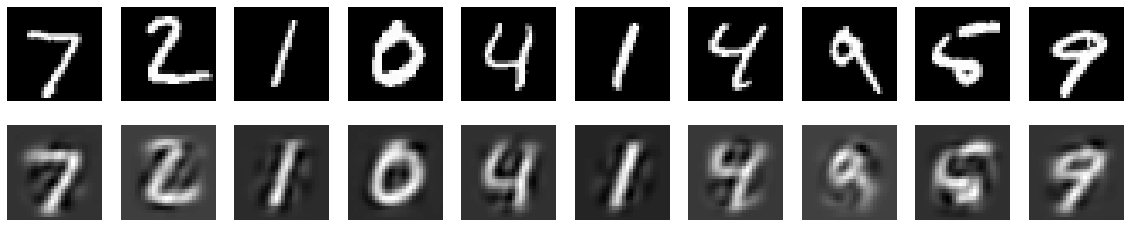

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2,10, (i+1))
  plt.imshow(test_X[i])
  plt.axis('off')
  plt.gray()
  
  plt.subplot(2, 10, (i+1+10))
  plt.imshow(pred1[i].reshape(28,28))
  plt.axis('off')
  plt.gray()


In [4]:
train_X = train_X.reshape(-1, 28*28)  


In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(784, activation="relu", input_shape=(784,)),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(784, activation="sigmoid")
])
model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(train_X, train_X, epochs=10, batch_size=256) #x 에서 x 구함 

Epoch 1/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0507 - accuracy: 0.0091
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0171 - accuracy: 0.0114
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0121 - accuracy: 0.0115
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0102 - accuracy: 0.0119
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0090 - accuracy: 0.0119
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0082 - accuracy: 0.0132
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0077 - accuracy: 0.0126
Epoch 8/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0073 - accuracy: 0.0129
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0069 - accuracy: 0.0130
Epoch 10/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0066 - accura

In [7]:
test_X = test_X.reshape(-1, 28*28)
pred2 = model.predict(test_X)

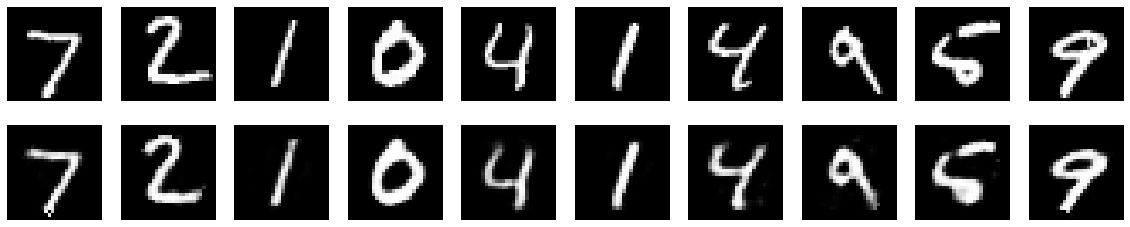

In [8]:
# test_X와 pred2이미지를 10개씩 출력하세요.
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2, 10, (i+1))
  plt.imshow(test_X[i].reshape(28,28))
  plt.axis('off')
  plt.gray()

  plt.subplot(2, 10, (i+1+10))
  plt.imshow(pred2[i].reshape(28, 28))
  plt.axis('off')
  plt.gray()
  #loss 낮아질수록 이미지가 원본에 가깝게 선명해짐

In [18]:
#CNN 사용하기 (개수, 이미지크기, 이미지크기, 채널)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X  = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    #인코딩                         
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), 
                           strides=(2,2), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), 
                           strides=(2,2), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    #디코딩
    tf.keras.layers.Dense(7 * 7 * 64,activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(2,2),
                            strides=(2,2), activation="relu", padding="same"),    
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(2,2),
                            strides=(2,2), activation="relu", padding="same")
])

model.compile(optimizer="adam", loss="mse")
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 32)       

In [12]:
# 모델 학습
model.fit(train_X, train_X, epochs=10, batch_size=256)


Epoch 1/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0353
Epoch 2/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0080
Epoch 3/10
235/235 [==============================] - 20s 85ms/step - loss: 0.0055
Epoch 4/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0045
Epoch 5/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0040
Epoch 6/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0037
Epoch 7/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0035
Epoch 8/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0033
Epoch 9/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0032
Epoch 10/10
235/235 [==============================] - 20s 84ms/step - loss: 0.0031


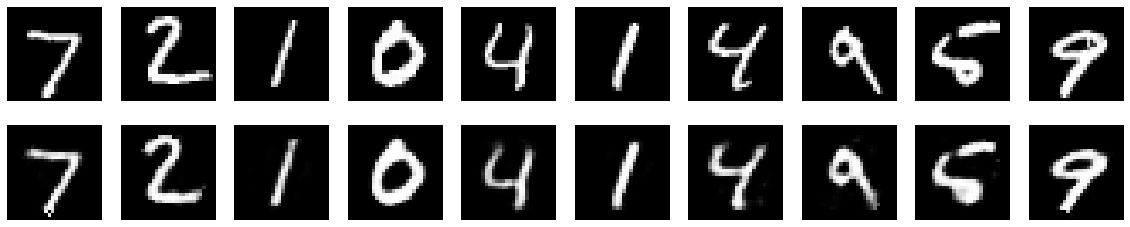

In [13]:
# 예측치 확인
pred3 = model.predict(test_X)


# 결과 출력
# test_X와 pred3이미지를 10개씩 출력하세요.
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for i in range(10):
  plt.subplot(2, 10, (i+1))
  plt.imshow(test_X[i].reshape(28,28))
  plt.axis('off')
  plt.gray()

  plt.subplot(2, 10, (i+1+10))
  plt.imshow(pred2[i].reshape(28, 28))
  plt.axis('off')
  plt.gray()
  

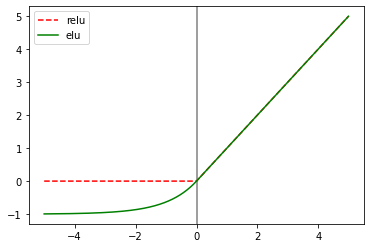

In [16]:
# 오토인코더 활성화 함수
import math
import numpy as np

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()



In [17]:
model.evaluate(test_X, test_X, verbose=2)

313/313 - 2s - loss: 0.0030


0.003048127284273505

In [19]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_10 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 32)       

In [20]:
model.fit(train_X, train_X, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 20s 86ms/step - loss: 0.0744
Epoch 2/5
235/235 [==============================] - 20s 85ms/step - loss: 0.0298
Epoch 3/5
235/235 [==============================] - 20s 85ms/step - loss: 0.0240
Epoch 4/5
235/235 [==============================] - 20s 85ms/step - loss: 0.0219
Epoch 5/5
235/235 [==============================] - 20s 85ms/step - loss: 0.0210


In [21]:
# 엔코딩 부분만 가져오기
model1 = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)

# 참고 : 층을 추가할 경우
output = tf.keras.layers.Dense(10, activation='elu')(model.layers[3].output)
model2 = tf.keras.Model(inputs=model.input, outputs=output)
model2.summary()


# 예측값 확인
pred4 = model1.predict( train_X )
pred4.shape


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 209,834
Trainable params: 209,834
Non-trainable params: 0
________________________________________________

(60000, 64)

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=30, random_state=42)
kmeans.fit(pred4) # 예측값을 KMeans에 적용 
# 60000개의 데이터를 10개의 그룹으로 분류함.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([4, 6, 7, ..., 4, 7, 7], dtype=int32)

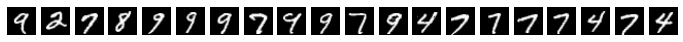

In [25]:
import matplotlib.pyplot as plt

labels = kmeans.labels_
plt.figure(figsize=(12,12))

k = 0
for i in range(60000):
  if labels[i] == 0:
    k = k + 1
    
    plt.subplot(1, 20, k)
    plt.imshow( train_X[i].reshape(28,28) )
    plt.axis('off')
    
    if k>= 20:
      break
  